In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../common')

In [2]:
# define global variables
test_size = 0.2
random_state = 42

In [3]:
# Read the dataset
dataset = pd.read_csv('../Data/data.csv')
dataset.head(10)

,Id,Length,Width,Type
0,1,21.353462,17.489515,0
1,2,19.777907,20.954282,0
2,3,21.959486,22.399416,0
3,4,16.237031,17.155274,0
4,5,21.547234,23.214418,0
5,6,16.651716,15.504583,0
6,7,23.233582,19.005026,0
7,8,21.018607,23.798118,0
8,9,20.893276,19.365433,0
9,10,19.054253,19.517992,0


In [4]:
# We will not use Id as part of classification
dataset = dataset.drop(['Id'], axis = 1)
dataset.head(10)

,Length,Width,Type
0,21.353462,17.489515,0
1,19.777907,20.954282,0
2,21.959486,22.399416,0
3,16.237031,17.155274,0
4,21.547234,23.214418,0
5,16.651716,15.504583,0
6,23.233582,19.005026,0
7,21.018607,23.798118,0
8,20.893276,19.365433,0
9,19.054253,19.517992,0


In [5]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [6]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from commonfunctions import print_classification_results, plot_classification_summary

classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state = random_state
                               ,algorithm = 'SAMME')

In [13]:
classifier.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=42)

Confusion Matrix:
 [[142  16]
 [ 17 225]]
Accuracy score: 0.9175
Classification Report:
              precision    recall  f1-score   support

          0       0.89      0.90      0.90       158
          1       0.93      0.93      0.93       242

avg / total       0.92      0.92      0.92       400

Confusion Matrix:
 [[35  7]
 [ 5 53]]
Accuracy score: 0.88
Classification Report:
              precision    recall  f1-score   support

          0       0.88      0.83      0.85        42
          1       0.88      0.91      0.90        58

avg / total       0.88      0.88      0.88       100



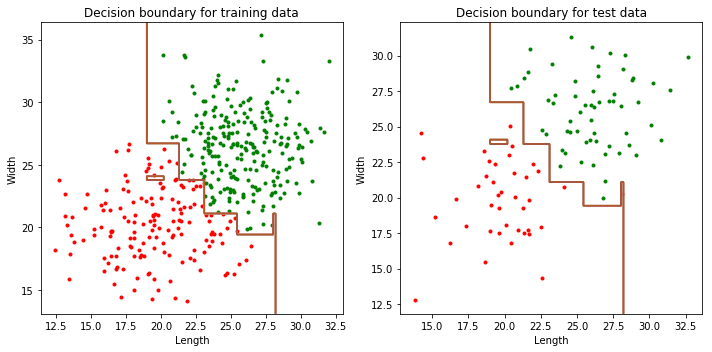

In [14]:
print_classification_results(Y_train, classifier.predict(X_train))
print_classification_results(Y_test, classifier.predict(X_test))
plot_classification_summary(X_train, classifier.predict(X_train), X_test, classifier.predict(X_test), classifier, plt)

In [17]:
from sklearn.tree import export_graphviz
import graphviz 


graphs = []
for i in range(0,5):
    clf = classifier.estimators_[i] # Getting the individual tree
    
    # Print the classification results
    print ("Tree ", i + 1)
    print_classification_results(Y_train, clf.predict(X_train))
    
    dot_data = export_graphviz(clf, out_file=None,
                                    feature_names=['Length', 'Width'],
                                    class_names=['Normal', 'Premium'],
                                    filled=True, rounded=True)
 
    graph = graphviz.Source(dot_data, format='png')    
    graph.render("Adaboost" + (str)(i))
    graphs.append(("Adaboost" + (str)(i) + ".png", classifier.estimator_weights_[i], classifier.estimator_errors_[i]))
        

Tree  1
Confusion Matrix:
 [[110  48]
 [ 10 232]]
Accuracy score: 0.855
Classification Report:
              precision    recall  f1-score   support

          0       0.92      0.70      0.79       158
          1       0.83      0.96      0.89       242

avg / total       0.86      0.85      0.85       400

Tree  2
Confusion Matrix:
 [[139  19]
 [ 56 186]]
Accuracy score: 0.8125
Classification Report:
              precision    recall  f1-score   support

          0       0.71      0.88      0.79       158
          1       0.91      0.77      0.83       242

avg / total       0.83      0.81      0.81       400

Tree  3
Confusion Matrix:
 [[153   5]
 [117 125]]
Accuracy score: 0.695
Classification Report:
              precision    recall  f1-score   support

          0       0.57      0.97      0.71       158
          1       0.96      0.52      0.67       242

avg / total       0.81      0.69      0.69       400

Tree  4
Confusion Matrix:
 [[101  57]
 [  9 233]]
Accuracy score: 

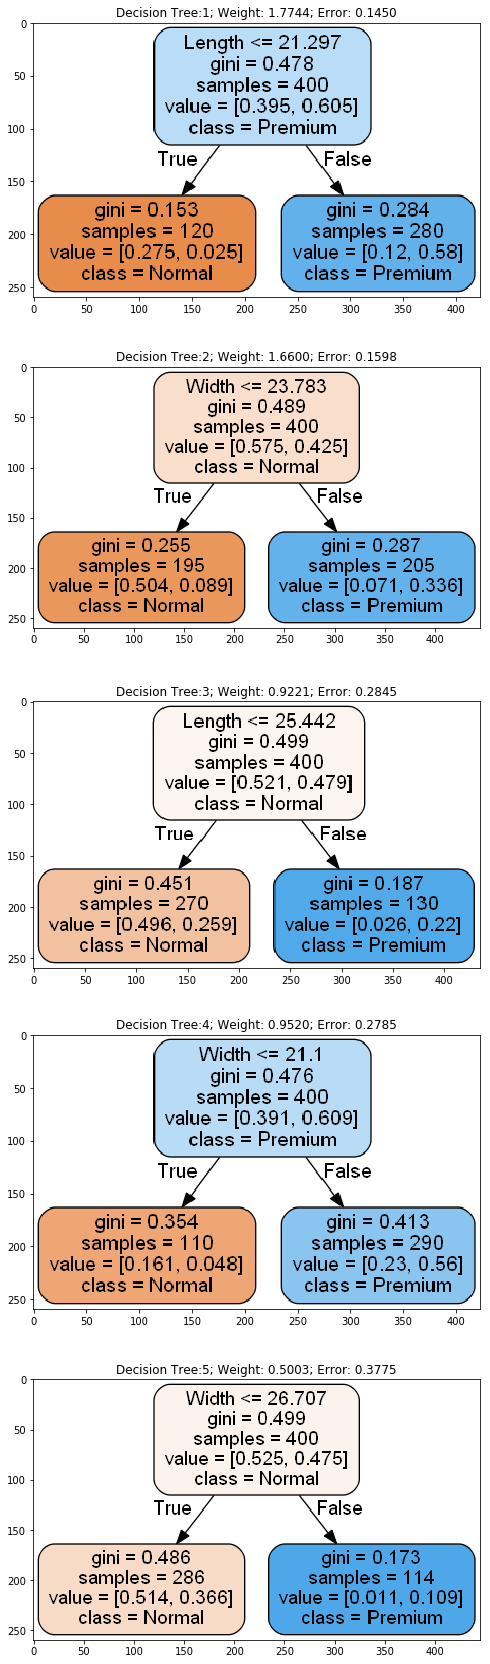

In [18]:
import matplotlib.image as image

fig = plt.figure(figsize=(8, 30))

i = 0
for graph in graphs:
    image_name, weight, error = graph
    fig.add_subplot(5,1,i+1)
    im = image.imread(image_name)
    plt.title("Decision Tree:" + (str)(i + 1) + "; Weight: " + "{:6.4f}".format(weight) +  "; Error: " + "{:6.4f}".format(error))
    plt.imshow(im)
    i = i + 1

plt.show()                         